In [1]:
# LSTM MODEL OUTPUTS


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# here iam loading the resources
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math


In [6]:
def encode(df):
  current_features = df.drop(columns = ['Subject ID', 'MRI ID'])
  label_encoder = LabelEncoder()
  current_features['Group'] = label_encoder.fit_transform(current_features['Group'])
  current_features['Group'] = np.where(current_features['Group'] == 2, 0, 1)
  current_features['M/F'] = label_encoder.fit_transform( current_features['M/F'])
  current_features['Hand'] = label_encoder.fit_transform( current_features['Hand'])
  return  current_features

In [7]:
# loading the cleaned dataframe
# loading the cleaned dataframe
# drive.mount('/content/drive')
# df = '/content/drive/MyDrive/FYP-CSV/ADNI NEW/Cleaned_data/Patient_tabular_data.csv'
# df = pd.read_csv(df)
df = pd.read_excel('https://sites.wustl.edu/oasisbrains/files/2024/03/oasis_longitudinal_demographics-8d83e569fa2e2d30.xlsx')
# display(df)
# preprocessing the data, taking in the categorical features and label encoding them
df = df.dropna()
display(df)
df = df.drop(['MR Delay'], axis=1)
df = df.reset_index(drop=True)
display(df[df['Subject ID'] == 'OAS2_0144'])
PTID = df['Subject ID']
MRI_ID = df['MRI ID']
Group = df['Group']
AGE = df['Age']
df = encode(df)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215.330000,0.709512,1.444060
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200.100000,0.718214,1.462380
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1688.580000,0.711502,1.039330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


,Subject ID,MRI ID,Group,Visit,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
283,OAS2_0144,OAS2_0144_MR1,Converted,1,M,R,77,16,1.0,30.0,0.0,1703.68,0.716324,1.03013
284,OAS2_0144,OAS2_0144_MR2,Converted,2,M,R,79,16,1.0,30.0,0.5,1721.81,0.707768,1.01927


In [8]:
values_df = df.values
display(df.values)
display(df)

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.98655000e+03, 6.96106000e-01, 8.83440000e-01],
       [0.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        2.00447953e+03, 6.81062000e-01, 8.75539000e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.21533000e+03, 7.09512000e-01, 1.44406000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.31902000e+03, 8.01006000e-01, 1.33054000e+00],
       [0.00000000e+00, 2.00000000e+00, 0.00000000e+00, ...,
        1.32665000e+03, 7.95981000e-01, 1.32289000e+00],
       [0.00000000e+00, 3.00000000e+00, 0.00000000e+00, ...,
        1.33294446e+03, 8.01248000e-01, 1.31663400e+00]])

,Group,Visit,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,1,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,0,2,1,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,0,1,0,0,88,18,3.0,28.0,0.0,1215.330000,0.709512,1.444060
3,0,2,0,0,90,18,3.0,27.0,0.0,1200.100000,0.718214,1.462380
4,0,1,1,0,80,12,4.0,28.0,0.0,1688.580000,0.711502,1.039330
...,...,...,...,...,...,...,...,...,...,...,...,...
349,1,2,1,0,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
350,1,3,1,0,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
351,0,1,0,0,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
352,0,2,0,0,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [9]:
# framing the supervised learning problem as prediciting the likleyhood of developing AD
def supervised(data, input_TS = 1, output_TS = 1, dropnan = True):
  # getting the number of features within the dataset
  num_features = 1 if type(data) is list else data.shape[1]
  # assigning them to a dataframe and making two empty lists for data/feature names
  df = pd.DataFrame(data)
  col_data, col_names = list(), list()
  # past time steps
  for i in range(input_TS, 0, -1):
    col_data.append(df.shift(i))
    col_names += [('var%d(t-%d)'% (j + 1, i )) for j in range(num_features)]

  # future time steps

  for i in range(0, output_TS):
    col_data.append(df.shift(-i))
    if i == 0:
      col_names += [('var%d(t)'% (j + 1 )) for j in range(num_features)]
    else:
      col_names += [('var%d(t-%d)'% (j + 1, i )) for j in range(num_features)]
#  concatenating the past and future time steps into one df

  result_df = pd.concat(col_data, axis = 1)
  result_df.columns = col_names

  # dropping entries with missing values

  if dropnan:
    result_df.dropna(inplace = True)
  return result_df


In [10]:
# normalisation of the df features
new_scale = MinMaxScaler(feature_range = (0,1))
scaled_df = new_scale.fit_transform(values_df)
# using the supervised method to frame the df as supervised learning
supervised_df = supervised(scaled_df, 1, 1)
display(supervised_df)
# isolating the feature we want to predict, resulting in 8 input variables/ 1 target (output variable aka group)
supervised_df.drop(['var2(t)','var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)'],axis = 1, inplace = True)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t)
1,0.0,0.00,1.0,0.0,0.710526,0.470588,0.25,0.884615,0.00,0.980052,...,1.0,0.0,0.736842,0.470588,0.25,1.000000,0.00,1.000000,0.190514,0.000000
2,0.0,0.25,1.0,0.0,0.736842,0.470588,0.25,1.000000,0.00,1.000000,...,0.0,0.0,0.736842,0.705882,0.50,0.923077,0.00,0.122023,0.338350,0.798755
3,0.0,0.00,0.0,0.0,0.736842,0.705882,0.50,0.923077,0.00,0.122023,...,0.0,0.0,0.789474,0.705882,0.50,0.884615,0.00,0.105079,0.383568,0.824494
4,0.0,0.25,0.0,0.0,0.789474,0.705882,0.50,0.884615,0.00,0.105079,...,1.0,0.0,0.526316,0.352941,0.75,0.923077,0.00,0.648542,0.348690,0.230121
5,0.0,0.00,1.0,0.0,0.526316,0.352941,0.75,0.923077,0.00,0.648542,...,1.0,0.0,0.605263,0.352941,0.75,0.961538,0.25,0.662052,0.346362,0.219702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.0,0.00,1.0,0.0,0.526316,0.588235,0.00,0.923077,0.25,0.665242,...,1.0,0.0,0.578947,0.588235,0.00,0.923077,0.25,0.653326,0.257359,0.226412
350,1.0,0.25,1.0,0.0,0.578947,0.588235,0.00,0.923077,0.25,0.653326,...,1.0,0.0,0.684211,0.588235,0.00,0.846154,0.25,0.647908,0.161388,0.230622
351,1.0,0.50,1.0,0.0,0.684211,0.588235,0.00,0.846154,0.25,0.647908,...,0.0,0.0,0.026316,0.411765,0.25,1.000000,0.00,0.237384,0.813784,0.639263
352,0.0,0.00,0.0,0.0,0.026316,0.411765,0.25,1.000000,0.00,0.237384,...,0.0,0.0,0.078947,0.411765,0.25,1.000000,0.00,0.245873,0.787672,0.628515


In [11]:
display(supervised_df)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var1(t)
1,0.0,0.00,1.0,0.0,0.710526,0.470588,0.25,0.884615,0.00,0.980052,0.268687,0.011101,0.0
2,0.0,0.25,1.0,0.0,0.736842,0.470588,0.25,1.000000,0.00,1.000000,0.190514,0.000000,0.0
3,0.0,0.00,0.0,0.0,0.736842,0.705882,0.50,0.923077,0.00,0.122023,0.338350,0.798755,0.0
4,0.0,0.25,0.0,0.0,0.789474,0.705882,0.50,0.884615,0.00,0.105079,0.383568,0.824494,0.0
5,0.0,0.00,1.0,0.0,0.526316,0.352941,0.75,0.923077,0.00,0.648542,0.348690,0.230121,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.0,0.00,1.0,0.0,0.526316,0.588235,0.00,0.923077,0.25,0.665242,0.343702,0.217266,1.0
350,1.0,0.25,1.0,0.0,0.578947,0.588235,0.00,0.923077,0.25,0.653326,0.257359,0.226412,1.0
351,1.0,0.50,1.0,0.0,0.684211,0.588235,0.00,0.846154,0.25,0.647908,0.161388,0.230622,0.0
352,0.0,0.00,0.0,0.0,0.026316,0.411765,0.25,1.000000,0.00,0.237384,0.813784,0.639263,0.0


In [29]:
# test/training data split
values_final = supervised_df.values

training, testing_to_split= train_test_split(values_final, train_size=0.7, test_size = 0.3, random_state = 44, shuffle = False)
validation, testing = train_test_split(values_final, train_size=0.2, test_size = 0.1, random_state = 44, shuffle = False)

PTID_train, PTID_test_to_split= train_test_split(PTID, train_size=0.7, test_size = 0.3, random_state = 44, shuffle = False)
PTID_val, PTID_test = train_test_split(PTID, train_size=0.2, test_size = 0.1, random_state = 44, shuffle = False)

Group_train, Group_test_to_split = train_test_split(Group, train_size=0.7, test_size = 0.3, random_state = 44, shuffle = False)
Group_val, Group_test = train_test_split(Group, train_size=0.2, test_size = 0.1, random_state = 44, shuffle = False)

Age_train, Age_test_test_to_split = train_test_split(AGE, train_size=0.7, test_size = 0.3, random_state = 44, shuffle = False)
Age_val, Age_test = train_test_split(AGE,  train_size=0.2, test_size = 0.1, random_state = 44, shuffle = False)
# inputs/outputs within those training and test sets
train_in, train_out = training[:, :-1], training[:, -1]
test_in, test_out = testing[:, :-1], testing[:, -1]
val_in, val_out = validation[:, :-1], validation[:, -1]
# reshaping the data to be 3 dimensional (samples, timesteps and features)
train_in = train_in.reshape((train_in.shape[0], 1, train_in.shape[1]))
test_in = test_in.reshape((test_in.shape[0], 1, test_in.shape[1]))
val_in = val_in.reshape((val_in.shape[0], 1, val_in.shape[1]))
print(train_in.shape, train_out.shape, test_in.shape, test_out.shape)

(247, 1, 12) (247,) (36, 1, 12) (36,)


In [34]:
#  creating/fitting the LSTM model
from tensorflow.keras.callbacks import EarlyStopping
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, input_shape=(train_in.shape[1], train_in.shape[2])))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mae', optimizer='Adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
his = LSTM_model.fit(train_in, train_out, validation_data=(val_in, val_out), epochs=40, batch_size=128, verbose=3, callbacks=[early_stopping])

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


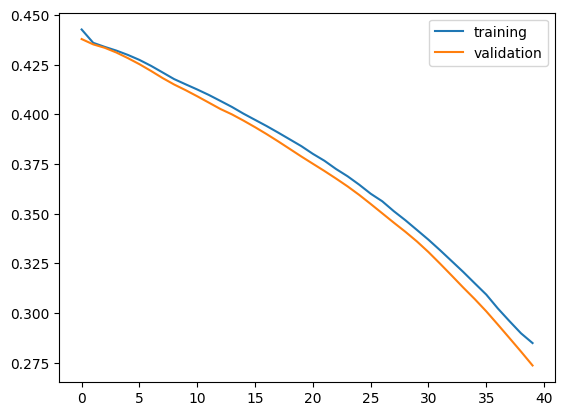

In [35]:
plt.plot(his.history['loss'], label = "training")
plt.plot(his.history['val_loss'], label = "validation")
plt.legend()
plt.show()

In [36]:
# getting a prediction
# print(PTID.shape)
num_features = 1 if type(test_in) is list else test_in.shape[1]
# print(test_in.shape)
predicted_yhat = LSTM_model.predict(test_in)
df = pd.DataFrame(predicted_yhat, columns=['probabilties'])
print(df)
def risk_filter(i):
  if i <= 0.3:
        return "low"
  elif 0.3 < i <= 0.5:
        return "medium"
  elif 0.5 < i:
        return "high"
df['risk'] = df['probabilties'].apply(risk_filter)
display(df)
y_hat_classes = np.argmax(predicted_yhat, axis=1)
# display(y_hat_classes)
# print(y_hat_classes.shape)
predictions_df = pd.DataFrame({"PTID": PTID_test.values, "Age": Age_test.values , "Predicted_Alzheimer's": df['risk'],  "Actual_Alzheimer's": Group_test.values})
display(predictions_df)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
    probabilties
0       0.836867
1       0.843008
2       0.971177
3       0.967899
4       0.968659
5       0.613735
6       0.614944
7       0.724794
8      -0.027504
9      -0.021549
10      0.747875
11      0.762832
12      1.099089
13      1.108625
14      1.106298
15      0.048987
16      0.053249
17      0.711467
18      0.823950
19      0.041648
20      0.052265
21      0.862415
22      0.860446
23      0.867605
24      0.879105
25      0.886074
26     -0.002950
27     -0.003654
28      0.001783
29      0.918688
30      1.043491
31      0.000960
32     -0.002384
33     -0.003604
34      0.115368
35      0.124510


,probabilties,risk
0,0.836867,high
1,0.843008,high
2,0.971177,high
3,0.967899,high
4,0.968659,high
5,0.613735,high
6,0.614944,high
7,0.724794,high
8,-0.027504,low
9,-0.021549,low


,PTID,Age,Predicted_Alzheimer's,Actual_Alzheimer's
0,OAS2_0039,81,high,Demented
1,OAS2_0039,83,high,Demented
2,OAS2_0040,84,high,Demented
3,OAS2_0040,86,high,Demented
4,OAS2_0040,88,high,Demented
5,OAS2_0041,71,high,Converted
6,OAS2_0041,73,high,Converted
7,OAS2_0041,75,high,Converted
8,OAS2_0042,70,low,Nondemented
9,OAS2_0042,73,low,Nondemented


In [16]:
# git pull origin main - update local repo
#